# PREDICTING LOAN STATUS 
<h4>Problem Statement:</h4>The loan department spend a lot of time and effort manually analyzing the information of all customers seeking for loan approval. Most times, these customer do not meet all requirements, resulting to waste of resources.
<h4>Objectives:</h4> Build a machine learning model, which utilizes available customer's data to accurately predict the status/outcome of a loan application.
<h4>Business Value:</h4> 
 - 1. Saves time and resources, allowing business to focus on cutomers with better chance of being approved.
 
 
<h4>By:</h4> Prisca Ekhaeyemhe 



In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## DATA EXPLORATION

In [2]:
df = pd.read_excel("loan_default.xlsx")

In [3]:
df.head()

,Unnamed: 0,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,140148,165038,2019,cf,Sex Not Available,pre,type1,p1,l1,nopc,...,CRIF,581,EXP,25-34,to_inst,93.238994,south,direct,0,42.0
1,124405,149295,2019,cf,Female,nopre,type1,p4,l1,nopc,...,CRIF,899,CIB,35-44,not_inst,89.884868,North,direct,0,36.0
2,6299,31189,2019,cf,Female,pre,type1,p3,l1,nopc,...,CRIF,679,EXP,45-54,to_inst,80.783582,south,direct,0,31.0
3,91914,116804,2019,cf,Male,pre,type1,p3,l1,nopc,...,CIB,880,CIB,55-64,to_inst,38.911290,central,direct,0,31.0
4,116508,141398,2019,cf,Male,nopre,type1,p3,l1,nopc,...,CRIF,745,EXP,65-74,to_inst,53.440367,North,direct,0,35.0


In [4]:
df.shape

(14867, 35)

In [5]:
df.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,14867.000000,14867.000000,14867.0,1.486700e+04,11228.000000,11203.000000,10919.000000,14860.000000,1.336500e+04,13950.000000,14867.000000,13365.000000,14867.000000,12459.000000
mean,74187.851483,99077.851483,2019.0,3.321353e+05,4.049423,0.443051,3204.867910,335.441992,4.984886e+05,6910.055914,698.705186,73.145668,0.246452,37.796452
std,43007.014663,43007.014663,0.0,1.818893e+05,0.560483,0.512912,3245.373397,57.963573,3.518242e+05,6099.250080,115.297767,69.693239,0.430959,10.477873
min,2.000000,24892.000000,2019.0,2.650000e+04,2.250000,-1.046200,0.000000,96.000000,8.000000e+03,0.000000,500.000000,3.125000,0.000000,5.000000
25%,36661.000000,61551.000000,2019.0,1.965000e+05,3.625000,0.073650,492.040000,360.000000,2.680000e+05,3720.000000,600.000000,60.658915,0.000000,31.000000
50%,74039.000000,98929.000000,2019.0,2.965000e+05,3.990000,0.391100,2552.500000,360.000000,4.180000e+05,5760.000000,697.000000,75.173611,0.000000,39.000000
75%,111584.500000,136474.500000,2019.0,4.365000e+05,4.490000,0.778600,4865.000000,360.000000,6.280000e+05,8460.000000,799.500000,86.073825,0.000000,45.000000
max,148661.000000,173551.000000,2019.0,3.006500e+06,6.240000,1.991500,29015.490000,360.000000,8.508000e+06,335880.000000,900.000000,7831.250000,1.000000,61.000000


In [6]:
df.describe(include=['O'])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,14534,14867,14787,14867,14853,14867,14867,14867,14855,14867,...,14867,14867,14867,14867,14867,14867,14842,14842,14867,14867
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,13583,4323,12522,11360,5633,14274,14817,12760,13378,14145,...,14865,13860,14865,14635,4786,7475,3509,9533,7474,14865


In [7]:
df.Status.nunique()

2

In [8]:
df.Status.unique()

array([0, 1], dtype=int64)

In [9]:
df.Status.value_counts()

0    11203
1     3664
Name: Status, dtype: int64

##### This is an imbalance dataset: this means that in building a model with this dataset, the probability of classifying any datapoint as status 0 is approx 76% while the probabilty of classifying a data as 1 is 24%. Hence the classifier will always be bias towards status 0.
Hence the accuracy of the classifier will be maximal when predicting statuses of 0
Before deciding on a way of handling this, lets define the goal of this classifier.
##### Goal: The classifier should accurately predict a loan decision or status given the information of the customer.
 - 1. Since the goal is not to get a classifier with very high accuracy but rather a model with good quality prediction (precision) and good quantity prediction (recall). It make sense to balance the dataset.
 - 2.  Another alternative will be to use a tree base classifier because its usually robust to imbalance data
 - 3. SInce this dataset is a high dimensional data, upsampling the class 1 will increase the volumne and reduce problem resulting from the curse of dimensionality.
 - 4. Downsampling the class 0 will also improve performance if we decide to reduce the dimensions of the data

In [10]:
# place the target variable 'status' as the last column
df = df[[col for col in df.columns if col not in ['Status']] + ['Status']]

### Finding Missing Values

In [11]:
# numerical columns
numcol = df.select_dtypes(include=['float64','int64'])

In [12]:
numcol.columns

Index(['Unnamed: 0', 'ID', 'year', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'property_value',
       'income', 'Credit_Score', 'LTV', 'dtir1', 'Status'],
      dtype='object')

In [13]:
# categorical columns
catcol = df.select_dtypes(include=['object'])
catcol.columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [14]:
numcol.describe()

,Unnamed: 0,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,dtir1,Status
count,14867.000000,14867.000000,14867.0,1.486700e+04,11228.000000,11203.000000,10919.000000,14860.000000,1.336500e+04,13950.000000,14867.000000,13365.000000,12459.000000,14867.000000
mean,74187.851483,99077.851483,2019.0,3.321353e+05,4.049423,0.443051,3204.867910,335.441992,4.984886e+05,6910.055914,698.705186,73.145668,37.796452,0.246452
std,43007.014663,43007.014663,0.0,1.818893e+05,0.560483,0.512912,3245.373397,57.963573,3.518242e+05,6099.250080,115.297767,69.693239,10.477873,0.430959
min,2.000000,24892.000000,2019.0,2.650000e+04,2.250000,-1.046200,0.000000,96.000000,8.000000e+03,0.000000,500.000000,3.125000,5.000000,0.000000
25%,36661.000000,61551.000000,2019.0,1.965000e+05,3.625000,0.073650,492.040000,360.000000,2.680000e+05,3720.000000,600.000000,60.658915,31.000000,0.000000
50%,74039.000000,98929.000000,2019.0,2.965000e+05,3.990000,0.391100,2552.500000,360.000000,4.180000e+05,5760.000000,697.000000,75.173611,39.000000,0.000000
75%,111584.500000,136474.500000,2019.0,4.365000e+05,4.490000,0.778600,4865.000000,360.000000,6.280000e+05,8460.000000,799.500000,86.073825,45.000000,0.000000
max,148661.000000,173551.000000,2019.0,3.006500e+06,6.240000,1.991500,29015.490000,360.000000,8.508000e+06,335880.000000,900.000000,7831.250000,61.000000,1.000000


In [15]:
# null values count
numcol.isnull().sum()

Unnamed: 0                 0
ID                         0
year                       0
loan_amount                0
rate_of_interest        3639
Interest_rate_spread    3664
Upfront_charges         3948
term                       7
property_value          1502
income                   917
Credit_Score               0
LTV                     1502
dtir1                   2408
Status                     0
dtype: int64

In [16]:
catcol.describe()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,14534,14867,14787,14867,14853,14867,14867,14867,14855,14867,...,14867,14867,14867,14867,14867,14867,14842,14842,14867,14867
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct
freq,13583,4323,12522,11360,5633,14274,14817,12760,13378,14145,...,14865,13860,14865,14635,4786,7475,3509,9533,7474,14865


In [17]:
# null values count
catcol.isnull().sum()

loan_limit                   333
Gender                         0
approv_in_adv                 80
loan_type                      0
loan_purpose                  14
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
Neg_ammortization             12
interest_only                  0
lump_sum_payment               0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
credit_type                    0
co-applicant_credit_type       0
age                           25
submission_of_application     25
Region                         0
Security_Type                  0
dtype: int64

### Handling Missing Values:
 - 1. Numerical columns with missing values: 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term''property_value', 'income', 'LTV', 'dtir1'
 - 2. Categorical columns with missing values: loan_limit, approv_in_adv, loan_purpose, Neg_ammortization, age,submission_of_application

###### Rate of Interest

In [18]:
# rate of interest
df[['rate_of_interest', 'Status']].groupby('Status').count()

,rate_of_interest
Status,
0,11203
1,25


In [19]:
df.loc[df['rate_of_interest'].isnull()]['Status'].value_counts()

1    3639
Name: Status, dtype: int64

##### all the missing values are from class 1. Lets see the range of rate_of_interest with status 1

In [20]:
#f = df.loc[df['Status']==1]
df[df['rate_of_interest'].notnull()].loc[df['Status']==1]['rate_of_interest']

11255    3.875
11448    3.990
11537    4.125
12099    4.250
12199    3.990
12402    4.375
12438    4.490
12466    4.375
12570    4.250
12688    4.990
12772    3.750
12876    3.875
13292    3.750
13310    3.875
13543    4.125
13610    4.375
13621    4.375
13839    4.990
14116    4.990
14242    3.750
14428    3.750
14569    3.750
14574    3.875
14617    4.990
14646    3.750
Name: rate_of_interest, dtype: float64

#####  This column has about 24% missing values, all of which are from a single category 1. Removing these rows will further make the dataset imbalance. We can either remove this column entirely from the model or extrapolate to get the missing values. 
##### Extrapolating values: It can also be observed from the available data, the interest rate for status 1 lies between 3.7 & 4.9, also these values are dispersed between the 25 & 75 percentile. We will fill the missing values with the mean value from status 1.

In [21]:
status1_roi = df[df['rate_of_interest'].notnull()].loc[df['Status']==1]['rate_of_interest'].mean()
numcol['rate_of_interest'].fillna(value=status1_roi, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
status1_roi

4.1872

###### Interest_rate_spread

In [23]:
df[['Interest_rate_spread', 'Status']].groupby('Status').count()

,Interest_rate_spread
Status,
0,11203
1,0


###### The Interest_rate_spread have over 25% missing values all of which are status 1. And there are no data to infer what it's possible value could be.  We can choose to give all the missing value a unique value, but this could introduce some bias in the model. Hence we will remove this column from the model.

In [24]:
numcol.drop('Interest_rate_spread', axis=1, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###### Upfront_charges

In [25]:
df[['Upfront_charges', 'Status']].groupby('Status').count()

,Upfront_charges
Status,
0,10904
1,15


In [26]:
df[df['Upfront_charges'].notnull()].loc[df['Status']==1]['Upfront_charges']

11255       0.00
11448     832.08
12199       0.00
12402    9387.07
12438       0.00
12466     723.75
12688     584.68
12772    5612.89
12876       0.00
13292       0.00
13610       0.00
13839    2297.98
14116     553.85
14242       0.00
14617       0.00
Name: Upfront_charges, dtype: float64

In [27]:
df.loc[df['Upfront_charges'].isnull()]['Status'].value_counts()

1    3649
0     299
Name: Status, dtype: int64

###### 27% of the data is missing, with only 2% from the majority class 0 and >24% from the minority class 1.
###### Being that only 2% are missing from the majority class, we could fill these value using the mode from this class. However, it is difficult to infer the best possible value to fill in the other 24% from the class 1 because the data are not evenly spread, with a max of 9387 and a min of 0.
###### Hence to avoid introducing some bias, we eliminate this column from the model


In [28]:
numcol.drop("Upfront_charges", axis=1, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


###### Term

In [29]:
df[['term', 'Status']].groupby('Status').count()

,term
Status,
0,11198
1,3662


In [30]:
df.loc[df['term'].isnull()]['Status'].value_counts()

0    5
1    2
Name: Status, dtype: int64

In [31]:
df[df['term'].notnull()].loc[df['Status']==1]['term'].mean()

334.4270890223921

In [32]:
df[df['term'].notnull()].loc[df['Status']==1]['term'].mode()

0    360.0
dtype: float64

In [33]:
df[df['term'].notnull()].loc[df['Status']==0]['term'].mode()

0    360.0
dtype: float64

###### Only 7 rows are missing in this column and its values do not vary by Status. So we fill the missing values using the mode

In [34]:
term_mode = df[df['term'].notnull()].loc[df['Status']==0]['term'].mode()
numcol['term'].fillna(term_mode, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###### property_value

In [35]:
df[['property_value', 'Status']].groupby('Status').count()

,property_value
Status,
0,11203
1,2162


In [36]:
df.loc[df['property_value'].isnull()]['Status'].value_counts()

1    1502
Name: Status, dtype: int64

In [37]:
df[df['property_value'].notnull()].loc[df['Status']==1]['property_value'].mode()

0    308000.0
dtype: float64

In [38]:
df[df['property_value'].notnull()].loc[df['Status']==0]['property_value'].mode()

0    408000.0
dtype: float64

In [39]:
df[['property_value', 'Status']].groupby('Status').agg(['mean','max','min', 'count'])

property_value                           
                 mean        max      min  count
Status                                          
0       507270.731054  8508000.0   8000.0  11203
1       452981.498612  4058000.0  38000.0   2162

###### All the missing value are from status 1 class. There is a wide margin between the mean property value for customers with loan status as 1. But majority of them has property value of 308000. Hence, we fill the missing values using the mode

In [40]:
prop_mode = df[df['property_value'].notnull()].loc[df['Status']==1]['property_value'].mode()
numcol['property_value'].fillna(prop_mode, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###### Income

In [41]:
df[['income', 'Status']].groupby('Status').count()

,income
Status,
0,10413
1,3537


In [42]:
df.loc[df['income'].isnull()]['Status'].value_counts()

0    790
1    127
Name: Status, dtype: int64

In [43]:
df[['income', 'Status']].groupby('Status').agg(['count', 'mean','max','min'])

income                            
        count         mean       max  min
Status                                   
0       10413  7201.140882  335880.0  0.0
1        3537  6053.095844  114000.0  0.0

In [44]:
df[df['income'].notnull()].loc[df['Status']==1]['income'].mode()

0    0.0
dtype: float64

In [45]:
df[df['income'].notnull()].loc[df['Status']==0]['income'].mode()

0    6000.0
dtype: float64

###### we can choose either filling the missing values with the mode or mean.
######  Here, we fill the missing values using the mode of zero. With the assumption that customers who had no income data may not have any income afterall.

In [46]:
numcol['income'].fillna(0, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###### LTV

In [47]:
df[['LTV', 'Status']].groupby('Status').count()

,LTV
Status,
0,11203
1,2162


In [48]:
df.loc[df['LTV'].isnull()]['Status'].value_counts()

1    1502
Name: Status, dtype: int64

###### number and category of missing value is same as property value. Lets check for their relationship

In [49]:
df[df['LTV'].notnull()].loc[:, ['LTV', 'property_value']].corr()

,LTV,property_value
LTV,1.000000,-0.134149
property_value,-0.134149,1.000000


######  since they are not correlated, there is no need to drop one of them. Hence lets check if the missing value for LTV can be subsitituted

In [50]:
df[['LTV', 'Status']].groupby('Status').agg(['mean','max','min', 'count'])

LTV                              
             mean          max       min  count
Status                                         
0       72.661739  7831.250000  3.125000  11203
1       75.653281   186.029412  6.865027   2162

In [51]:
df['LTV'].describe()

count    13365.000000
mean        73.145668
std         69.693239
min          3.125000
25%         60.658915
50%         75.173611
75%         86.073825
max       7831.250000
Name: LTV, dtype: float64

In [52]:
df[df['LTV'].notnull()].loc[df['Status']==0]['LTV'].mode()

0    81.25
dtype: float64

In [53]:
df[df['LTV'].notnull()].loc[df['Status']==1]['LTV'].mode()

0    91.666667
dtype: float64

###### fill the missing value using the mean

In [54]:
ltv_mean = df[df['LTV'].notnull()].loc[df['Status']==1]['LTV'].mean()
numcol.fillna(ltv_mean, inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


###### notice the outlier 7831, will come to that

###### dtir1

In [55]:
df[['dtir1', 'Status']].groupby('Status').count()

,dtir1
Status,
0,10420
1,2039


In [56]:
df.loc[df['dtir1'].isnull()]['Status'].value_counts()

1    1625
0     783
Name: Status, dtype: int64

In [57]:
df[['dtir1', 'Status']].groupby('Status').agg(['mean','max','min', 'count'])

dtir1                  
             mean   max  min  count
Status                             
0       37.437620  61.0  5.0  10420
1       39.630211  61.0  5.0   2039

In [58]:
stat1_mean = df[df['dtir1'].notnull()].loc[df['Status']==1]['dtir1'].mean()
stat0_mean = df[df['dtir1'].notnull()].loc[df['Status']==0]['dtir1'].mean()

numcol.loc[numcol['Status']==1, 'dtir1'].fillna(stat1_mean, inplace=True)
numcol.loc[numcol['Status']==0, 'dtir1'].fillna(stat0_mean, inplace=True)

In [59]:
numcol.loc[numcol['dtir1'].isnull()]['Status'].value_counts()

Series([], Name: Status, dtype: int64)

#### Handling missing values on categorical columns
Categorical columns with missing values: loan_limit, approv_in_adv, loan_purpose, Neg_ammortization, age,submission_of_application

In [60]:
# null values count
catcol.isnull().sum()

loan_limit                   333
Gender                         0
approv_in_adv                 80
loan_type                      0
loan_purpose                  14
Credit_Worthiness              0
open_credit                    0
business_or_commercial         0
Neg_ammortization             12
interest_only                  0
lump_sum_payment               0
construction_type              0
occupancy_type                 0
Secured_by                     0
total_units                    0
credit_type                    0
co-applicant_credit_type       0
age                           25
submission_of_application     25
Region                         0
Security_Type                  0
dtype: int64

In [61]:
# add status column as target and convert to object type
catcol['target'] = df['Status'].astype('str')

C:\Users\prisc\AppData\Local\Temp/ipykernel_17840/1334760057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcol['target'] = df['Status'].astype('str')


###### Loan Limit

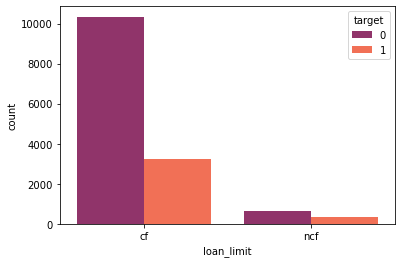

In [62]:
ax = sns.countplot(data=catcol, x='loan_limit', hue='target', saturation=1, alpha=0.9, palette='rocket')

In [63]:
catcol[['loan_limit', 'target']].groupby('target').count()

,loan_limit
target,
0,10966
1,3568


In [64]:
df.loc[df['loan_limit'].isnull()]['Status'].value_counts()

0    237
1     96
Name: Status, dtype: int64

In [65]:
# fill the missing value as a new category not_available 'na'
catcol['loan_limit'].fillna('na', inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###### Approve in Advance

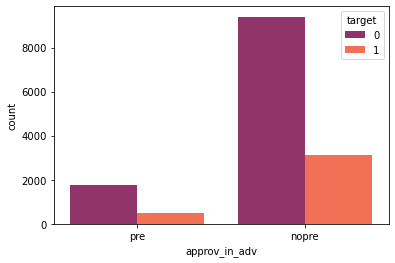

In [66]:
ax = sns.countplot(data=catcol, x='approv_in_adv', hue='target', saturation=1, alpha=0.9, palette='rocket')

In [67]:
# fill the missing value as a new category not_available 'na'
catcol['approv_in_adv'].fillna('na', inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Loan_Purpose

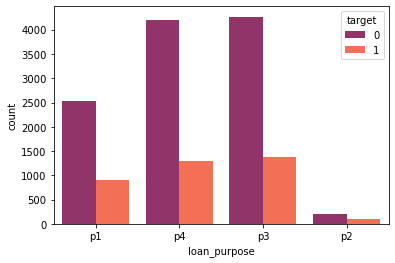

In [68]:
ax = sns.countplot(data=catcol, x='loan_purpose', hue='target', saturation=1, alpha=0.9, palette='rocket')

In [69]:
# fill missing value using most occurring category
catcol['loan_purpose'].fillna('p3', inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###### Negative ammortization

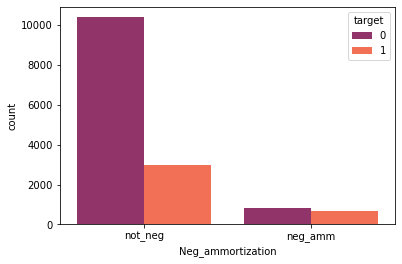

In [70]:
ax = sns.countplot(data=catcol, x='Neg_ammortization', hue='target', saturation=1, alpha=0.9, palette='rocket')

In [71]:
df.loc[df['Neg_ammortization'].isnull()]['Status'].value_counts()

0    9
1    3
Name: Status, dtype: int64

In [72]:
# Majority of the customers do not have negative ammortization. fill missing value using most occurring category
# we can also choose to eliminate this missing columns, since they are very few.
catcol['Neg_ammortization'].fillna('not_neg', inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


###### Age

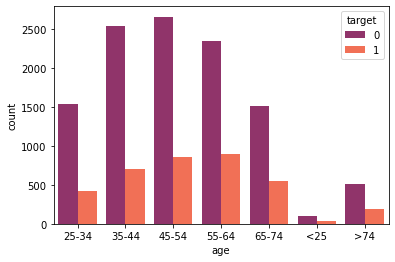

In [73]:
ax = sns.countplot(data=catcol, x='age', hue='target', saturation=1, alpha=0.9, palette='rocket')

In [74]:
# fill the missing value with the mode
catcol['age'].fillna('45-54', inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
catcol['age'].value_counts()

45-54    3534
35-44    3243
55-64    3238
65-74    2060
25-34    1951
>74       701
<25       140
Name: age, dtype: int64

###### Submission_of_application

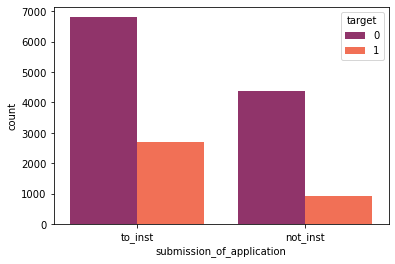

In [77]:
ax = sns.countplot(data=catcol, x='submission_of_application', hue='target', saturation=1, alpha=0.9, palette='rocket')

In [78]:
# fill missing value using most occurring category
catcol['submission_of_application'].fillna('to_inst', inplace=True)

C:\Users\prisc\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


## Feature Selection: Avoiding Overfitting due to redundant features

###### using Chisquare statistical test to select important non negative features that are relevant to the status columns

In [79]:
list(numcol)

['Unnamed: 0',
 'ID',
 'year',
 'loan_amount',
 'rate_of_interest',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'dtir1',
 'Status']

In [80]:
numcol.iloc[:,0:11].columns

Index(['Unnamed: 0', 'ID', 'year', 'loan_amount', 'rate_of_interest', 'term',
       'property_value', 'income', 'Credit_Score', 'LTV', 'dtir1'],
      dtype='object')

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = numcol.iloc[:,0:11]  #independent columns
y = numcol.iloc[:,-1]    #target column i.e status
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best featuresv

               Specs         Score
6     property_value  3.547343e+08
3        loan_amount  1.694345e+06
7             income  3.076992e+05
10             dtir1  1.509649e+04
9                LTV  3.366406e+02
0         Unnamed: 0  3.117407e+02
1                 ID  2.334262e+02
8       Credit_Score  4.737764e+01
5               term  1.549846e+01
4   rate_of_interest  1.289315e+01


###### Columns: property_value, loan_amount, rate of interest, income and dtir1 will be use in the model

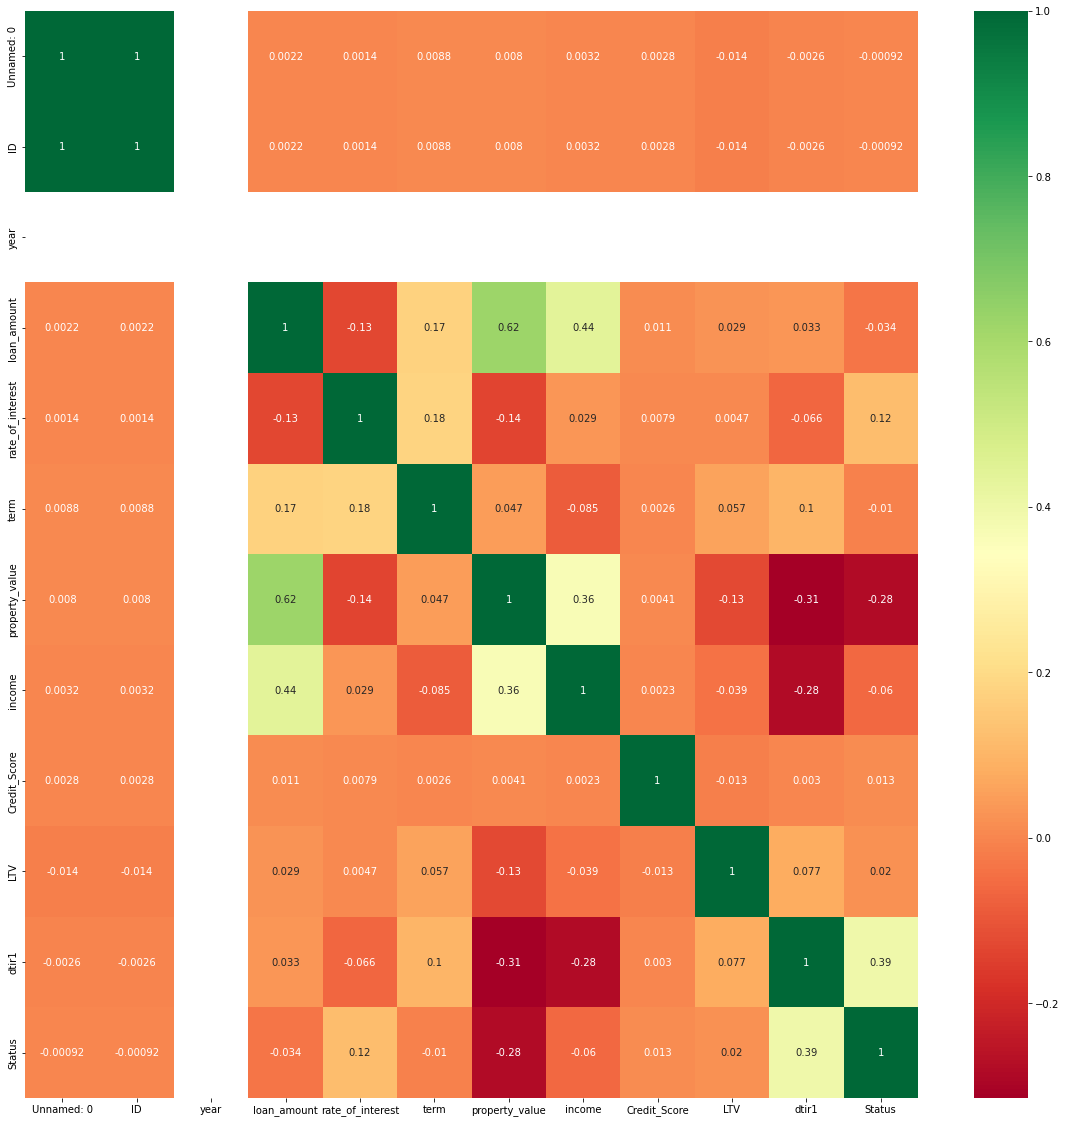

In [82]:
X = numcol.iloc[:,0:11]  #independent columns
y = numcol.iloc[:,-1]    #target column i.e status
#get correlations of each features in dataset
corrmat = numcol.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(numcol[top_corr_features].corr(),annot=True,cmap="RdYlGn")

###### Non of the selected variables are perfectly colinear.

In [83]:
list(catcol)

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type',
 'target']

In [84]:
catcol.iloc[:,0:21].columns

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

### Encoding Categorical Variables

In [85]:
catcol.describe()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,target
count,14867,14867,14867,14867,14867,14867,14867,14867,14867,14867,...,14867,14867,14867,14867,14867,14867,14867,14867,14867,14867
unique,3,4,3,3,4,2,2,2,2,2,...,3,2,4,4,2,7,2,4,2,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct,0
freq,13583,4323,12522,11360,5647,14274,14817,12760,13390,14145,...,13860,14865,14635,4786,7475,3534,9558,7474,14865,11203


In [86]:
catcol[['lump_sum_payment',
       'construction_type']].describe()

,lump_sum_payment,construction_type
count,14867,14867
unique,2,2
top,not_lpsm,sb
freq,14545,14865


###### `encoding binary categories as 0 or 1

In [87]:
catcol2 =  catcol.copy()

In [88]:
catcol2['Security_Type'] = np.where(catcol['Security_Type'].str.contains('direct'), 1, 0)


In [89]:
catcol2['submission_of_application'] = np.where(catcol['submission_of_application'].str.contains('to_inst'), 1, 0)
catcol2['co-applicant_credit_type'] = np.where(catcol['co-applicant_credit_type'].str.contains('CIB'), 1, 0)
catcol2['Secured_by'] = np.where(catcol['Secured_by'].str.contains('home'), 1, 0)
catcol2['interest_only'] = np.where(catcol['interest_only'].str.contains('not_int'), 1, 0)
catcol2['Neg_ammortization'] = np.where(catcol['Neg_ammortization'].str.contains('not_neg'), 1, 0)
catcol2['business_or_commercial'] = np.where(catcol['business_or_commercial'].str.contains('nob/c'), 1, 0)
catcol2['open_credit'] = np.where(catcol['open_credit'].str.contains('nopc'), 1, 0)
catcol2['Credit_Worthiness'] = np.where(catcol['Credit_Worthiness'].str.contains('l1'), 1, 0)
catcol2['lump_sum_payment'] = np.where(catcol['lump_sum_payment'].str.contains('not_lpsm'), 1, 0)
catcol2['construction_type'] = np.where(catcol['construction_type'].str.contains('sb'), 1, 0)



###### encode age with the mean of the age range value

In [90]:
catcol.age.unique()

array(['25-34', '35-44', '45-54', '55-64', '65-74', '<25', '>74'],
      dtype=object)

In [91]:
np.mean([7,8])

7.5

In [92]:
a = '25-45'
list(map(int, a.split('-')))

[25, 45]

In [93]:
def mean_age(x):
    if x.startswith('<'):
        return int(x[1:])
    else:
        return np.mean(list(map(int, a.split('-'))))
catcol2['agemean'] = catcol['age'].apply(mean_age)

In [94]:
catcol2.agemean

0        35.0
1        35.0
2        35.0
3        35.0
4        35.0
         ... 
14862    35.0
14863    35.0
14864    35.0
14865    35.0
14866    35.0
Name: agemean, Length: 14867, dtype: float64

In [95]:
catcol2.drop('age', axis=1, inplace=True)

###### Encode other multiple category variables using binaryencoding

In [96]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
catcol2['loan_limit'] = lb_make.fit_transform(catcol2['loan_limit'])
catcol2['Gender'] = lb_make.fit_transform(catcol2['Gender'])
catcol2['approv_in_adv'] = lb_make.fit_transform(catcol2['approv_in_adv'])
catcol2['loan_type'] = lb_make.fit_transform(catcol2['loan_type'])
catcol2['loan_purpose'] = lb_make.fit_transform(catcol2['loan_purpose'])
catcol2['occupancy_type'] = lb_make.fit_transform(catcol2['occupancy_type'])
catcol2['total_units'] = lb_make.fit_transform(catcol2['total_units'])
catcol2['credit_type'] = lb_make.fit_transform(catcol2['credit_type'])


In [97]:
catcol2.loan_limit.value_counts()

0    13583
2      951
1      333
Name: loan_limit, dtype: int64

In [98]:
catcol2.Gender.value_counts()

2    4323
1    4053
3    3752
0    2739
Name: Gender, dtype: int64

In [99]:
catcol2['approv_in_adv'].value_counts()

1    12522
2     2265
0       80
Name: approv_in_adv, dtype: int64

In [100]:
catcol2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14867 entries, 0 to 14866
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_limit                 14867 non-null  int32  
 1   Gender                     14867 non-null  int32  
 2   approv_in_adv              14867 non-null  int32  
 3   loan_type                  14867 non-null  int32  
 4   loan_purpose               14867 non-null  int32  
 5   Credit_Worthiness          14867 non-null  int32  
 6   open_credit                14867 non-null  int32  
 7   business_or_commercial     14867 non-null  int32  
 8   Neg_ammortization          14867 non-null  int32  
 9   interest_only              14867 non-null  int32  
 10  lump_sum_payment           14867 non-null  int32  
 11  construction_type          14867 non-null  int32  
 12  occupancy_type             14867 non-null  int32  
 13  Secured_by                 14867 non-null  int

In [101]:
catcol2['Region'] = lb_make.fit_transform(catcol2['Region'])

In [102]:
catcol2['Region'].value_counts()

0    7474
3    6424
2     845
1     124
Name: Region, dtype: int64

In [103]:
catcol2['target'] = lb_make.fit_transform(catcol2['target'])

In [104]:
catcol2.target.value_counts()

0    11203
1     3664
Name: target, dtype: int64

### Removing Redundant variables that could cause noise

###### Find the correlation btw previous categorical columns, to avoid problem due to multicolinearity

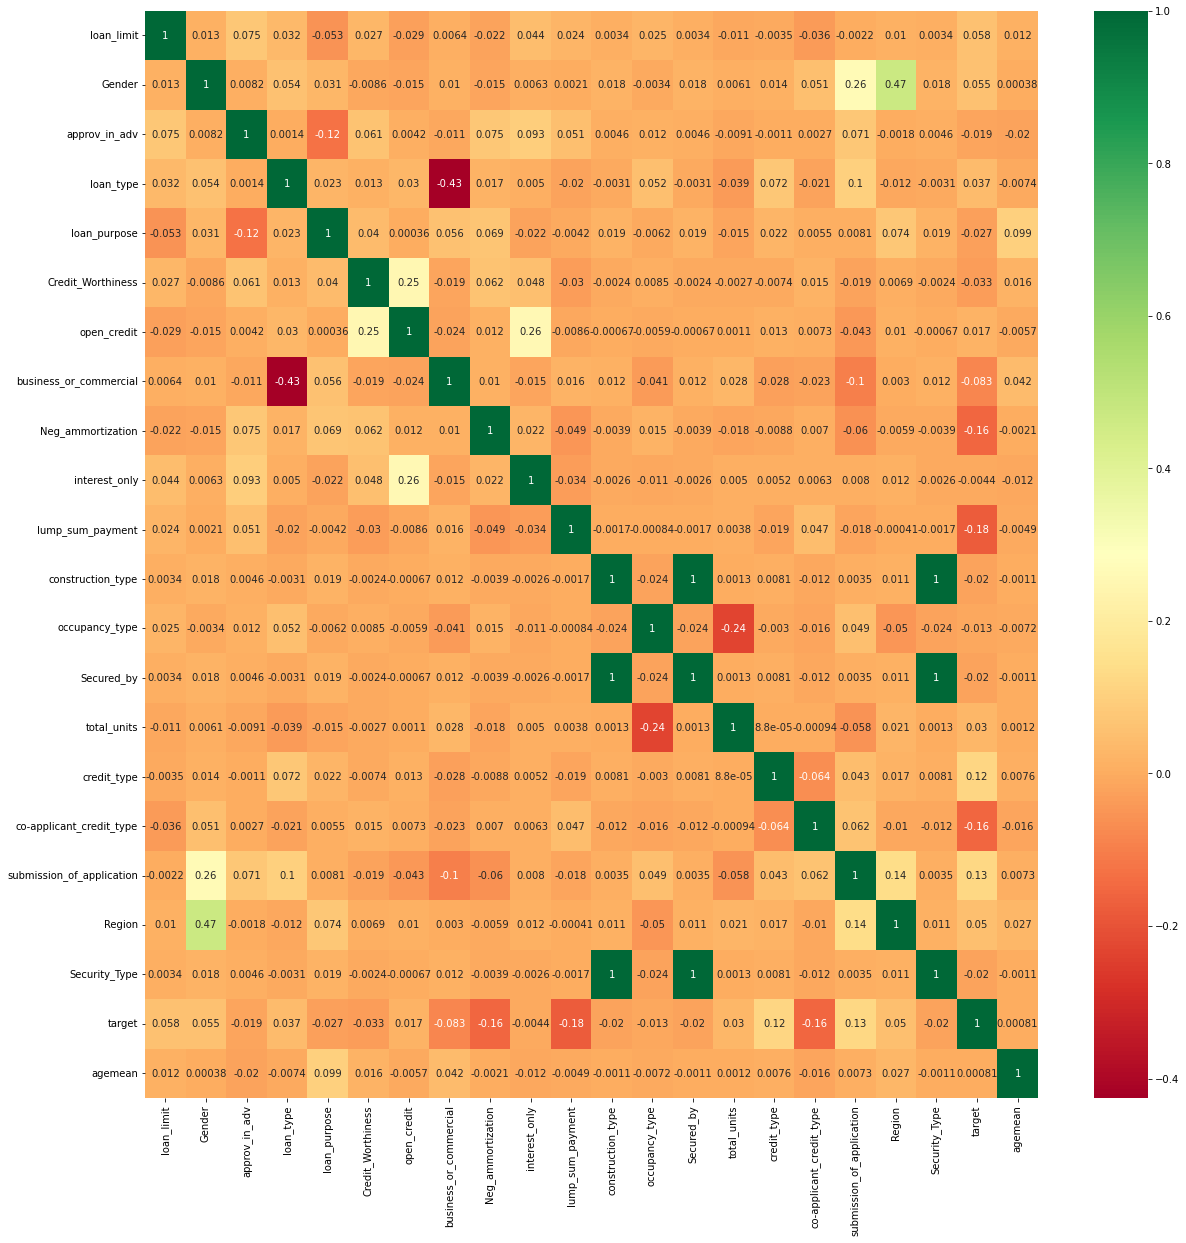

In [105]:
X = catcol2.loc[:,[col for col in catcol2.columns if col not in ['target']]]  #independent columns
y = catcol2.loc[:,'target']    #target column i.e status
#get correlations of each features in dataset
corrmat = catcol2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(catcol2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [106]:
catcol['Security_Type'].unique()

array(['direct', 'Indriect'], dtype=object)

In [107]:
catcol['Secured_by'].unique()

array(['home', 'land'], dtype=object)

In [108]:
catcol['construction_type'].unique()

array(['sb', 'mh'], dtype=object)

###### since these 3 columns are highly correlated, only one of the columns is added to the model

In [109]:
catcol2.drop(['Secured_by', 'construction_type'], axis=1, inplace=True)

###### Find the best features that is relevant to the target variable 'status' using feature importance from Extra tree classifier

[0.0276817  0.07942002 0.03322853 0.01651272 0.07100356 0.01948698
 0.00123785 0.01085967 0.04429662 0.01367954 0.04697834 0.02362121
 0.01250671 0.46963862 0.05308558 0.02857286 0.0422202  0.00081725
 0.00515203]


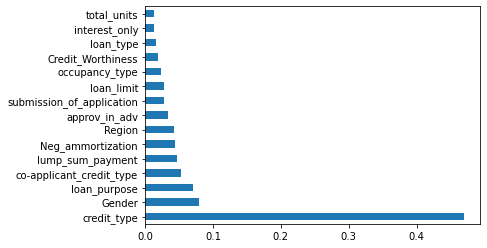

In [110]:
X = catcol2.loc[:,[col for col in catcol2.columns if col not in ['target']]]  #independent columns
y = catcol2.loc[:,'target']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

###### Lets use the top 10 best features highlighted in the plot

In [111]:
catcol3 = catcol2[['credit_type','Gender','loan_purpose','co-applicant_credit_type','lump_sum_payment','Region','Neg_ammortization',
                'approv_in_adv','submission_of_application','loan_limit']]

## BUILDING THE MODEL

In [112]:
main_df = numcol[['property_value','loan_amount','rate_of_interest','income','dtir1','Status']].merge(catcol3,left_index=True, right_index=True)

In [113]:
main_df.shape

(14867, 16)

In [114]:
main_df.head()

,property_value,loan_amount,rate_of_interest,income,dtir1,Status,credit_type,Gender,loan_purpose,co-applicant_credit_type,lump_sum_payment,Region,Neg_ammortization,approv_in_adv,submission_of_application,loan_limit
0,318000.0,296500,3.625,6300.0,42.0,0,1,3,0,0,1,3,1,2,1,0
1,608000.0,546500,3.750,7200.0,36.0,0,1,0,3,1,1,0,1,1,0,0
2,268000.0,216500,3.875,8400.0,31.0,0,1,0,2,0,1,3,1,2,1,0
3,248000.0,96500,4.875,2700.0,31.0,0,0,2,2,1,1,2,1,2,1,0
4,218000.0,116500,4.750,7320.0,35.0,0,1,2,2,0,1,0,1,1,1,0


###### Tree base classifier are robust to imbalance dataset. Therefore lets use the RandomForest which is an ensemble tree base algorithm. It is very robust to overfitting. Although it the missing data has been filled, the randomforest can handle missing data as well

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [117]:
X = main_df.loc[:,[col for col in main_df if col not in ['Status']]]  #independent columns
y = main_df.loc[:,'Status']    #target column i.e status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [118]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14862    1
14863    1
14864    1
14865    1
14866    1
Name: Status, Length: 14867, dtype: int64

In [119]:
X

,property_value,loan_amount,rate_of_interest,income,dtir1,credit_type,Gender,loan_purpose,co-applicant_credit_type,lump_sum_payment,Region,Neg_ammortization,approv_in_adv,submission_of_application,loan_limit
0,318000.000000,296500,3.6250,6300.0,42.000000,1,3,0,0,1,3,1,2,1,0
1,608000.000000,546500,3.7500,7200.0,36.000000,1,0,3,1,1,0,1,1,0,0
2,268000.000000,216500,3.8750,8400.0,31.000000,1,0,2,0,1,3,1,2,1,0
3,248000.000000,96500,4.8750,2700.0,31.000000,0,2,2,1,1,2,1,2,1,0
4,218000.000000,116500,4.7500,7320.0,35.000000,1,2,2,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14862,428000.000000,346500,4.1872,0.0,75.653281,3,0,3,1,1,0,1,1,1,0
14863,75.653281,76500,4.1872,2040.0,75.653281,2,3,2,0,1,3,1,1,1,0
14864,228000.000000,216500,4.1872,0.0,75.653281,3,3,3,0,1,3,1,1,1,0
14865,858000.000000,296500,4.1872,10200.0,47.000000,3,2,2,1,1,3,0,1,0,0


In [120]:
y_test.value_counts()

0    3341
1    1120
Name: Status, dtype: int64

In [121]:
y_train.value_counts()

0    7862
1    2544
Name: Status, dtype: int64

In [122]:
# train the forest using 100 decision trees
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
y_pred=clf.predict(X_test)

In [124]:
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## EVALUATING MODEL PERFORMANCE

In [125]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995516700291415


In [126]:
y_test.value_counts()

0    3341
1    1120
Name: Status, dtype: int64

In [127]:
result_df = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred})

In [128]:
result_df

,y_test,y_pred
8481,0,0
9566,0,0
5882,0,0
5688,0,0
2608,0,0
...,...,...
7071,0,0
364,0,0
13528,1,1
14713,1,1


In [129]:
result_df.loc[result_df['y_test']==1]

,y_test,y_pred
13447,1,1
13118,1,1
14346,1,1
12528,1,1
14464,1,1
...,...,...
14689,1,1
13331,1,1
13475,1,1
13528,1,1


###### Since this is an imbalance data, other evaluation metrics such as the precision and recall should also be use.
###### Precision tells us the quality of true positve prediction of the model. Recall gives the quantity of true positive prediction of the model

In [130]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [131]:
cm

array([[3339,    2],
       [   0, 1120]], dtype=int64)

In [132]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3341
           1       1.00      1.00      1.00      1120

    accuracy                           1.00      4461
   macro avg       1.00      1.00      1.00      4461
weighted avg       1.00      1.00      1.00      4461



### CONCLUSION

###### The model has a high accuracy of 99.99%,  precision of 100%, recall of 100% and f1-score of 100%. This is a very good performance on the test set. Showing the model will generalize well on unseen data. 
###### For total confidence in the model, it make sense to test the model on a separate validation set which was not use in the preprocessing stage.
